### 작성자: AISchool (http://aischool.ai/), Daniel Park

# 2장.원티드DB 국민연금 사업장 데이터 EDA
#### 탐색적 데이터 분석 (EDA)를 통해 아래 목표를 달성해봅시다 
- 데이터들의 분포 살펴보기 (직원 수, 매출액, 보험료, +@)
- 몇몇 회사를 선택하여 데이터 흐름 살펴보기
- 데이터 사이의 관계에 대해 유의미한 결론을 찾아봅시다.  (아이디어 수립 → EDA를 통해 관찰)  

### [ 데이터 설명 ]
- 회사 수: 약 5,000개
- 월별 데이터: 직원 수, 국민연금 보험료 (인원 수에 대한 상한선_최대고지금액 이 존재함)
- 년 단위 데이터: 매출액 (천원 단위)

## 라이브러리 임포트

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 출력을 위한 글꼴 설정

## 데이터 불러오기

## EDA 탐색적 데이터 분석 수행하기

#### 데이터의 통계량 살펴보기  
.describe() 함수로 각 열에 대한 대략적인 통계 값들을 볼 수 있습니다. (평균, 상위 25/50/75% 값, 최대/최소 값 등)

#### 데이터의 분포 눈으로 살펴보기  
dataframe의 .hist 함수로 히스토그램을 그려서 데이터의 분포를 봅시다.  
특정 회사가 너무 큰 값을 가져 그래프의 앞부분을 보기 어렵기 때문에, log 옵션을 True로 줍니다.  
 - bins은 히스토그램의 전체 막대수를 지정합니다
 - column은 히스토그램을 그릴 대상 컬럼을 지정합니다 (여기서는 3개를 지정했습니다)
 - figsize는 전체 Figure의 크기를 조절합니다
 - layout은 여러개의 차트를 그릴 때, 배치를 지정합니다
 - plt.tight_layout()은 차트 간 간격을 다시 조정하는 함수입니다.

                규모가 작은 (연매출액, 연금보험료, 직원 수가 작은) 회사의 수가 더 많은 것을 볼 수 있습니다.

#### 연속적인 데이터를 그룹핑하여 살펴봅시다.  
- 데이터를 정렬하여, 1분위, 2분위, 3분위, ... 식으로 그룹을 매깁니다
- pd.qcut은 전체 랭킹을 동일 갯수로 나누나, 값을 기준으로 binning을 할 수도 있습니다 (pd.cut)
- 아래 '연매출액'은 매출액이 작은 부분에 많은 수의 회사들이 몰려 있습니다. bin1에 해당하는 값의 구간이 짧습니다

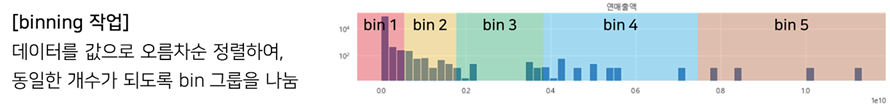

월별_연금보험료, 월별_직원수, 연매출액을 binning 해봅시다

binning한 데이터가 잘 들어갔나 확인해볼까요?

*\*qcut은 같은 개수만큼 자르는 것이 원칙이나, 값이 같은 경우 이를 포함합니다.
따라서 bin 별로 개수가 조금씩 다르게 나타날 수 있습니다.*

#### 분위별로 boxplot 그려보기

생성한 bin을 이용하여, bin 별로 데이터 통계를 한번 살펴봅시다. (boxplot)  
x과 y에 원하는 컬럼 명을 넣어서 한 번 그려보세요!  
- showfliers는 데이터의 극단 이상치 (outlier)를 표시하는지의 여부입니다. 여기서는 너무 그래프를 볼 수 없어 제거합니다.

In [ ]:
sns.boxplot(data= , x='', y='', showfliers= );

#### 두 축의 분위를 이용하여, 각각의 분위 별로 boxplot 그려보기

seaborn의 FacetGrid를 통해 조건(col)을 바꾸어가며, 여러 개의 차트를 한번에 그릴 수 있습니다.  
두 번째 줄의 g.map()의 인자로, 실제 차트의 종류와 차트 설정, 데이터를 넣어줍니다.  
map을 이용하여 그릴 때는, x, y의 인자의 이름을 넣지 않는다는 점을 주의하세요!
- sharex는 그래프들의 x축을, sharey는 그래프들의 y축을, 동일하게 (동일한 값과 간격) 그릴 것인지의 여부를 지정합니다 (True or False)
- boxplot의 order는 x축의 x의 순서를 지정합니다

In [ ]:
g = sns.FacetGrid( , col='', sharey= )
g.map(sns. , '', '', order= , showfliers= );

In [ ]:
g = sns.FacetGrid( , col='', sharey= )
g.map(sns. , '', '', order= , showfliers= );

                (관찰) 월별 직원수 5분위 bin에는 연금 보험료 분포 스펙트럼이 넓다!

In [ ]:
# 내 맘대로 그려보기
g = sns.FacetGrid(comp_nps_df, col='', sharey= )
g.map(sns.boxplot, '', '', order= , showfliers= );

#### 두 축의 분위를 이용하여, 각각의 분위 별로 scatter 그려보기
그래프를 scatter (점 그래프)로 변경하여 그려봅시다
- alpha는 그래프 (점)의 투명도를 지정합니다

In [ ]:
g = sns.FacetGrid(comp_nps_df, col='', sharex= , sharey= )
g.map(plt., '', '', alpha=.3);

In [ ]:
g = sns.FacetGrid(comp_nps_df, col='', sharex= , sharey= )
g.map(plt., '', '', alpha=.3);

                (추론) 직원수와 연금보험료의 기울기가 다른데, 아마 연봉Table의 차이 때문에 벌어지지 않을까 추측해봅니다

In [ ]:
g = sns.FacetGrid(comp_nps_df, col='', sharex=False, sharey=False)
g.map(plt.scatter, '', '', alpha=.3);

#### 개별 회사 별로 그래프 그려보기  
.query 함수는 3장에서 보다 자세히 배울 것입니다.  
인자로 넣어준 쿼리문의 조건으로 dataframe을 필터링하여 돌려줍니다. (조건에 만족하는 row만)  
마치 엑셀의 '필터'와 같은 역할을 합니다.
* 데이터의 순서가 무작위인데요, sort_values()에 '년도'과 '월'을 넣어서, 년-월의 순서대로 데이터를 정렬해봅시다

In [ ]:
comp_nps_df.query('회사ID == ')

In [ ]:
id233757 = comp_nps_df
id233757.head()

데이터는 잘 뽑혔는데, 그래프를 그리기 위해서는 '년도+월'을 함께 표시하는 컬럼이 있어야 합니다.  
dataframe에 새로운 컬럼을 연산을 통해 한번 추가해 봅시다

의도한대로 새로운 컬럼이 잘 생성되었으면, 그래프를 그려봅시다
- plt.title()은 그래프의 제목을 지정합니다.
- plt.xticks(rotation=90)은 그래프의 x축 눈금 라벨을 회전시키는 역할을 합니다 (가로로 하면 안보이겠죠?)
- lineplot에 지정한 label과, plt.legend()를 입력하여 범례를 표시할 수 있습니다

In [ ]:
sns.lineplot(data=id233757, x='', y='', label='')
sns.lineplot(data=id233757, x='', y='', label='')
plt.title('')
plt.xticks(rotation=0);
plt.legend();

In [ ]:
sns.lineplot(data=id233757, x='', y='')
plt.title('')
plt.xticks(rotation=0);

In [ ]:
sns.lineplot(data=id233757, x='', y='')
plt.title('')
plt.xticks(rotation=0);

##### <연습문제 2-EDA1-1>
새로운 아이디어가 떠올랐어요. 직원 1인당 매출액을 계산해보면 어떨까요?  
같은 직원 수 이어도 더 많은 매출을 올리는 회사가 실력있는 회사일 테지요.  
**아래의 과정을 수행해보세요. (아이디어를 수립, EDA까지 해보는 과정)**
1. **'1인당_매출액'**이라는 컬럼을 만들고, 그 값을 계산하여 추가해 봅시다.
2. `1인당_매출액`의 histogram 차트를 그려보세요.
3. `1인당_매출액`을 `월별_연금보험료bin` 별로 각각의 histogram 차트를 그려보세요.
4. **'1인당_매출액bin'**이라는 컬럼을 만들고, 앞에서와 같이 5분위로 binning 해 봅시다.
5. 최종적으로 `월별_연금보험료`를 `1인당_매출액bin`의 분위 별로 boxplot 차트를 그려보세요

### EDA를 통해 데이터를 살펴보고 뜯어보았습니다. <br/>한번 여러분들께서 나름대로의 가설을 세우고, 추가적으로 분석해보세요!